In [2]:
# 1. Cài đặt các thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [15]:
# Nạp dữ liệu từ file csv + xem dữ liệu
dataset = pd.read_csv("DOGE-USD (2).csv")
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,0.002346,0.002392,0.002322,0.002392,0.002392,17364744
1,2019-01-02,0.002388,0.002458,0.002372,0.002407,0.002407,18015392
2,2019-01-03,0.002404,0.002414,0.002356,0.002360,0.002360,17619234
3,2019-01-04,0.002364,0.002397,0.002274,0.002315,0.002315,19530100
4,2019-01-05,0.002320,0.002350,0.002280,0.002319,0.002319,17148586
...,...,...,...,...,...,...,...
1581,2023-05-01,0.079760,0.079996,0.077628,0.078820,0.078820,325694977
1582,2023-05-02,0.078822,0.079045,0.077832,0.078806,0.078806,234651604
1583,2023-05-03,0.078806,0.080527,0.077328,0.079713,0.079713,306950726
1584,2023-05-04,0.079703,0.079736,0.078156,0.078449,0.078449,255462655


In [16]:
# 2. Đọc file dữ liệu DOGE-USD và chia train test validate theo tỉ lệ 7:1:2
data = pd.read_csv('DOGE-USD (2).csv')
data = data[['Close']]
data = data.dropna() 
data = data.reset_index(drop=True) 

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [17]:
# Xem data 
data

,Close
0,0.002392
1,0.002407
2,0.002360
3,0.002315
4,0.002319
...,...
1581,0.078820
1582,0.078806
1583,0.079713
1584,0.078449


In [18]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [19]:
# 4. TESTING  
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. VALIDATE
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [22]:
# 6. Tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Tạo một mảng gồm 30 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Dự đoán closing price trong 30 ngày tới
y_next_30_days = model.predict(x_next_30_days)

# In giá closing price dự đoán trong 30 ngày tới
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[0.34024557 0.34050648 0.34076739 0.3410283  0.34128921 0.34155012
 0.34181103 0.34207193 0.34233284 0.34259375 0.34285466 0.34311557
 0.34337648 0.34363739 0.34389829 0.3441592  0.34442011 0.34468102
 0.34494193 0.34520284 0.34546374 0.34572465 0.34598556 0.34624647
 0.34650738 0.34676829 0.3470292  0.3472901  0.34755101 0.34781192]


In [23]:
# 7. ĐÁNH GIÁ ĐỘ CHÍNH XÁC CỦA VAL + TEST
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 0.23747852188255675
Testing RMSE: 0.17002592607238953


Validation RMSE: 0.23747852188255675
Testing RMSE: 0.17002592607238953


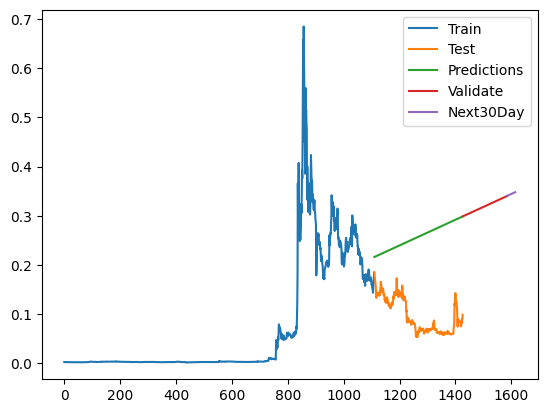

In [24]:
# 8. Root Mean Squared Error
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ đồ thị
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [25]:
test_data.index

RangeIndex(start=1110, stop=1427, step=1)